<a href="https://colab.research.google.com/github/1nilx2/Mccombs/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization

In [2]:
!pip install gurobipy
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy.optimize import minimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Linear Programming

## LP1

In [ ]:
'''
    6 oz  = X1
    10 oz = X2 
    num_constraint = 3
    1) production hour
    2) storage
    3) demand on x1

    * X1, X2 >= 0
    This is already assumed in gurobi
    When it's not the case, we can specify using 'lb' (lower bound)
'''
obj = np.array([5.0, 4.5])
A = np.zeros((3,2))
sense = np.array(['']*A.shape[0])
rhs = np.zeros(len(sense))

A[0,:] = np.array([3.6,3.0])
sense[0] = '<' 
rhs[0] = 3600

A[1,:]   = np.array([10,20])
sense[1] = '<'
rhs[1]   =  15000

A[2,1] = 1
sense[2] = '<'
rhs[2] = 800

In [ ]:
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(2) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, rhs) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel.optimize()

In [ ]:
ojModel.objval

5142.857142857143

In [ ]:
ojModX.x

array([642.85714286, 428.57142857])

### Maximization To Minimization

$ From \;\; max_x \; f(x) \; $ \\
$ To \;\; min_x -f(x) $  <br/>

understand with simple quadratic equation

### Binding/Non-Binidng & Slack

In [ ]:
'''
    An ineqauiltiy constraint is binding if the solution makes it an equality
    Otherwise, it is non-binidng

    The positive difference between the two sides of the constraint
    is called **Slack**

    We does know that Slack occurs only for non-binding constraints
'''

### How does the Simplex Method work?

## LP2

| Train Wagon | Weight Capa | Space cap |
| ---         |  -------    |   -----   |
| w1          |      10     |     5000  |
| w2          | 8           |     4000  |
| w3          | 12          |     8000  |

| Cargo Type  | Available   | Volume      | Profit / tonne |
| ---         |  -------    |   -----     | -------        |
| c1          |      18     |     400     | 2000           |
| c2          | 10          |     300     | 2500           |
| c3          | 5           |     200     | 5000           |
| c3          | 20          |     500     | 3500           |

In [ ]:
'''
    How much of each cargo should be loaded on which wagon
    >> We need 12 decision variables 3*4

    generalized.
    Xij = amount on wagon i with cargo j

    Obejctive
        2000X_1 + 2500X_2 + 5000X_3 + 3500X_4  < '_' contains all (wagon 1,2,3)

    Constraints

    1. Weight Capacity
        sum(X1_) = 10
        sum(X2_) = 8
        sum(X3_) = 12

    2. Space Cap
        sum(X1_) = 5000
        ...
    
    3. Available 
        sum(X_1) < 18
        ...
        sum(X_4) < 20
'''

In [ ]:
obj = np.array([2000,2500,5000,3500]*3) # 3 cars, each get same profit per ton of product in car

A = np.zeros((10,12))
A[0,0:4] = 1 # total tons in car 1
A[1,4:8] = 1 # total tons in car 2
A[2,8:12] = 1 # total tons in car 3
A[3,0:4] = [400,300,200,500] # volume in car 1
A[4,4:8] = [400,300,200,500] # volume in car 2
A[5,8:12] = [400,300,200,500] # volume in car 3
# sum tons in each car of each product to get tons available constraint
A[6:10,0:4] = np.diag(np.ones(4)) 
A[6:10,4:8] = np.diag(np.ones(4))
A[6:10,8:12] = np.diag(np.ones(4))
print(A)
b = np.array([10,8,12,5000,4000,8000,18,10,5,20])
sense = np.array(['<']*10)

[[  1.   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   1.   1.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.]
 [400. 300. 200. 500.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 400. 300. 200. 500.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 400. 300. 200. 500.]
 [  1.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   1.]]


In [ ]:
trainMod = gp.Model()

Trainx = trainMod.addMVar(len(obj)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
TrainModCon = trainMod.addMConstrs(A, Trainx, sense, b) # add the constraints to the model
trainMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

trainMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
trainMod.optimize()

In [ ]:
print(f"Objective value is  {trainMod.objVal} ")
print(f"Cargo for wagons are {Trainx.x}")

Objective value is  107500.0 
Cargo for wagons are [ 0.  5.  5.  0.  0.  0.  0.  8.  0.  0.  0. 12.]


## LP3. Refinidng Problem

In [ ]:
obj = np.array([20,15]) # barrels of Saudi and Ven oil

A = np.zeros((3,2))
A[0,] = [0.3,0.4] # gasoline constraint
A[1,] = [0.4,0.2] # jet fuel constraint
A[2,] = [0.2,0.3] # lube constraint

ub = np.array([9000,6000]) # saudi and ven upper bound # We can also handle this in matrix A

b = np.array([2000,1500,500])

sense = np.array(['>','>','>'])


In [ ]:
refMod = gp.Model()
refX = refMod.addMVar(len(obj),ub=ub)
refModCon = refMod.addMConstrs(A, refX, sense, b)
refMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
refMod.Params.OutputFlag=0
refMod.optimize()

In [ ]:
print(f"Objective value is  {refMod.objVal} ")
print(f"Optimized amount of crude oil from each country are {refX.x}")

Objective value is  92500.0 
Optimized amount of crude oil from each country are [2000. 3500.]


## Sensitivity Analysis

We can imagine that if a constraint is binding, <br/>
relaxing the condition might improve objective value and vice-versa

**Shadow price or dual varialbe** associated with a particular constraint is <br/>
the change in optimal value per unit increase in RHS for the constraint,<br/>
while all others remain unchnaged

Shadow prices remain constant over a particular range of the RHS

## Slack Variables

Especially when their is lagging value from the previous time frame;
or when inequallity is not desirable, we can add slack variables, which reduces tedious duplications. Actually Simplex method adopts this method.

## Integer Programming

Some or all variables are restricted to be integers. </br>
Main difference with LP occurs in that IP </br>can impose speical types of conditions on our optimization solution. 

For example, only when project 1 is implemented, project 2 can be 
implemented </br></br> $X_1 < Y_1,  where \; Y_1, X_1 ∈ [0,1]$
</br></br>
IP requires enumerations and is NP-hard problem. </br>
What if we utilize LP?

### Branch and Bound

Solve problem as an LP</br>
See if the optimal corner is non-integer
 - if so, add constraints and cut off that corner to make it integer-corner






# Non-linear Programming 

we know that linear objective function and linear constraints are not always realistic. </br>
With this realistic NLP, we might not find optimal solution using feasible corners. </br></br>

One option can be find first-order derivatives and locate the point make it zero. </br>
 - But, what if the objective function is not deferentiable?
 - What if we don't know the what the objective function is
 - x that makes f(x)=0 can be maximum/minimum/saddle


 When is a local minimum guaranteed to be global minimum?</br>
 we need to know 
  - Convex/Concave function
  - Convex sets


## Convex function

if we draw a line between two points, every values of the function are located below the straight line.

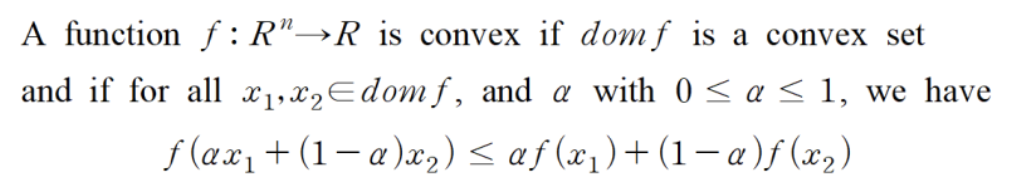

If we have a function that consists of differentiable variables, 
how do know know whether this is convex/concave?

**Using Hessian Matrix**

Why checking our problem is convex is important?
Because we can make sure that our local minimum is global minimum and thus using the techniques for pinpointing local minima. 

Mathemetical Characteristics of Convex Problem
 - objective is convex
 - inequality constraints are convex
 - equality constraints are linear
 - local minima is global minima

General Portraits
 - No analytical solutions
 - There are many algorithms/softwares to solve convex problem
 - Many tricks exists for altering non-convex problem to convex
 





## Python Packages for NLP

scipy.optimize / pyomo / pysolnp

#### For scipy.optimize, you must tell solver type
 - BFGS: for unconsrained problems
 - L-BFGS-B: for box constraints $(a≤x\le b)$
 - SLSQP: for general constraints

 - These wokr well only for convex programs

#### Minimize $f \; ≡  \;$  Maximize $-f$
#### Maximize $f \; ≡  \;$  Minimize $-f$

In [4]:
# Scipy
# 1)Def function to minimize

def neg_profit(price):
    demand = 3777178*(price[0]**(-2.154))
    rev = price[0]*demand
    cost = demand*50

    profit = rev - cost
    return (-profit)


In [5]:
# 2)Run Sicpy with appropriate information for type of solver

optProfit = minimize(neg_profit, [100], method='L-BFGS-B', bounds=[(0,1000)], tol=1e-8)
print(optProfit.x)
print(optProfit.fun)

[93.32767827]
-9343.946309318624


In [8]:
# Scipy One more example
# 1)def function to minimize

def get_dist(xy):
    dist1 = np.sqrt((5-xy[0])**2 + (10-xy[1])**2 )
    dist2 = np.sqrt((10-xy[0])**2 + (5-xy[1])**2 ) 
    dist3 = np.sqrt((0-xy[0])**2 + (12-xy[1])**2 )
    dist4 = np.sqrt((12-xy[0])**2 + (0-xy[1])**2 )

    tot_dist = 2 * (dist1*200 + dist2*150 + dist3*200 + dist4*300)
    return tot_dist

# 2)run scipy with approp info

optDist = minimize(get_dist, [200,100], method='BFGS')
print(optDist.x)
print(optDist.fun)


[9.31416525 5.0287053 ]
10913.079375025736


### What if we add more constraints for this problem?
How we can form the constraints with Minimize function

In [9]:
# Inequality constraints must be >= 0
# So if we want to impose a constraint that
# A river runs diagonally through town and 
# The warehouse needs to be on the north side of the river <=> Y>X

# We can express like this: X[1] > X[0] 
# However, as we said, what can remain on the RHS is 0
# Re-formulate this X[1] - X[0] >= 0

# ' >=0 ' part can be ommited

def confun(x):
    return x[1] - x[0]

constr1 = {'type': 'ineq', 'fun':confun}
constraints = [constr1]

best_loc_north = minimize( get_dist, [3,2], constraints=constraints )
print(best_loc_north.x)
print(best_loc_north.fun)

[6.93579245 6.93579245]
11124.981578185989


### Quirks of Non-Linear Solvers

If you have an inequality constraint, it's usually best for your initial guess to be at a point that does not satisfy the inequality constraint

If you have an equality constraint, you should start at a point that satisfies that constraint

### Jacobian
If we can do a little calculus then we can do better!

The jacobian is the vector of partial derivatives

If we can calculate the jacobian of the objective and each constraint the solver will work better

In [10]:
def con_jac(xy):
    return [-1,1]

In [11]:
con1 = constr1 = {'type':'ineq', 'fun': confun, 'jac': con_jac}
con = [con1]

In [12]:
def obj_jac(xy):
    dd1dx = 0.5/np.sqrt((5-xy[0])**2 + (10-xy[1])**2)*2*(xy[0]-5)
    dd1dy = 0.5/np.sqrt((5-xy[0])**2 + (10-xy[1])**2)*2*(xy[1]-10)
    dd2dx = 0.5/np.sqrt((10-xy[0])**2 + (5-xy[1])**2)*2*(xy[0]-10)
    dd2dy = 0.5/np.sqrt((10-xy[0])**2 + (5-xy[1])**2)*2*(xy[1]-5)
    dd3dx = 0.5/np.sqrt((0-xy[0])**2 + (12-xy[1])**2)*2*(xy[0]-0)
    dd3dy = 0.5/np.sqrt((0-xy[0])**2 + (12-xy[1])**2)*2*(xy[1]-12)
    dd4dx = 0.5/np.sqrt((12-xy[0])**2 + (0-xy[1])**2)*2*(xy[0]-12)
    dd4dy = 0.5/np.sqrt((12-xy[0])**2 + (0-xy[1])**2)*2*(xy[1]-0)
    
    return [2*(dd1dx*200 + dd2dx*150 + dd3dx*200 + dd4dx*300), 2*(dd1dy*200 + dd2dy*150 + dd3dy*200 + dd4dy*300)]

In [15]:
best_loc_north_withJacobian = minimize(get_dist,[3,2],constraints=con,jac=obj_jac)

print(best_loc_north_withJacobian.x)
print(best_loc_north_withJacobian.fun)

[6.93579262 6.93579262]
11124.981578187218


## Quadratic Programming (QP)

 - A special type of NLP

 - The general form of QP is

$$ min_x \;  x^TQx + c^Tx $$ \\
$$s.t. \; Ax ≤ b, x ≥ 0$$

In gurobi, the only step needed is \\
to tell 'Q' to the objective. $X^T, X$ assumed automatically






### Portfolio Optimization
 - The goal is to minimize variance, maximizing return

> $ min_{W} \; W^T \sum W $ </br>
> $ s.t.$
>> $ 1^TW = 1 $ \\
>> $ r^TW ≥ R $ \\
>> $ w \ge 0 $

$\sum$ is a pairwise covariance matrix of stock returns







In [17]:
# R
threshold_return = 0.09

# r**T & Sigma
meanvec = np.array([.1073,.0737,.0627])
Sigma = np.zeros((3,3))
Sigma[0,:] = [0.0278,0.00387,0.000207]
Sigma[1,:] = [0.00387,0.0111,-0.000195]
Sigma[2,:] = [0.000207,-0.000195,0.00116]

w = np.ones(3)/3

print(w @ Sigma @ w)

print(w @ meanvec)

0.0053137777777777775
0.08123333333333334


In [18]:
# constraint0: weights sum to 1
# constraint1: mean return is >= 9%

A = np.ones((2,3)) # row 0 is all 1s already
A[1,:] = meanvec # now change row 1

b = np.ones(2) # row 0 is already 1
b[1] = threshold_return # now change row 1

sense = ['=','>'] 


In [19]:
portMod = gp.Model()
portMod_x = portMod.addMVar(3,ub=np.array([1,1,1]))
portMod_con = portMod.addMConstrs(A, portMod_x, sense, b)
portMod.setMObjective(Sigma,None,0,sense=gp.GRB.MINIMIZE)

portMod.Params.OutputFlag = 0 

portMod.optimize()


Restricted license - for non-production use only - expires 2023-10-25


In [20]:
print(portMod_x.x)
print(portMod.objVal)

[0.56328345 0.19795984 0.23875671]
0.010222039472786854


#### Now solve it as a general NLP

In [21]:
def obj_fun(x):
    return x @ Sigma @ x

In [22]:
# inequality constraints must be >= 0
def mean_con_fun(x):
    return (x @ meanvec) - threshold_return

In [23]:
# equality constraints must be =0
def all_invest_con(x):
    return np.sum(x)-1

In [24]:
con1 = {'type':'eq', 'fun': all_invest_con}
con2 = {'type':'ineq', 'fun': mean_con_fun}
cons = [con1,con2]
bds = [(0,1),(0,1),(0,1)] # all weights must be between 0-1

In [28]:
# if you don't tell it what method to use it will default to the correct method based on constraints/bounds

opt_port = minimize(obj_fun,w,constraints=cons,bounds=bds) 
print(opt_port.x)
print(opt_port.fun)

[0.56328343 0.19795991 0.23875666]
0.01022203949243753
